In [1]:
pip install pandas scikit-learn xgboost matplotlib seaborn


  intern_id  task_completion_time  feedback_rating  attendance_rate  \
0   INT1000                  5.75                4               93   
1   INT1001                  4.79                9               70   
2   INT1002                  5.97                8               93   
3   INT1003                  7.28                4               89   
4   INT1004                  4.65                6               80   

   final_score  
0        77.14  
1        62.54  
2        76.73  
3        78.85  
4        66.16  
intern_id               0
task_completion_time    0
feedback_rating         0
attendance_rate         0
final_score             0
dtype: int64

--- Random Forest Regressor ---
R2 Score: -0.19667799426896515
RMSE: 13.034095778188819

--- XGBoost Regressor ---
R2 Score: -0.1972116037639331
RMSE: 13.037001464653484


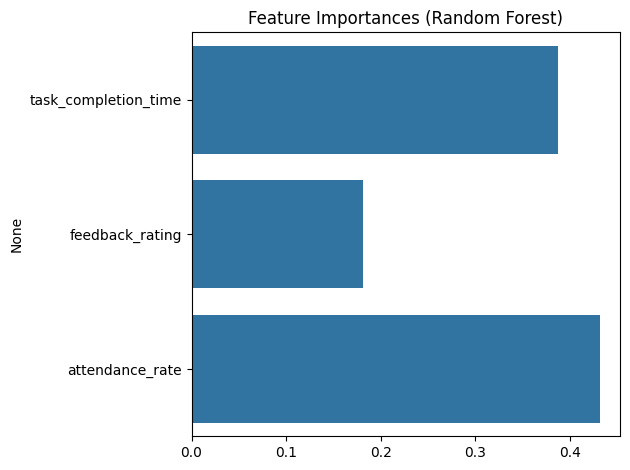

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load Dataset
df = pd.read_csv("/content/intern_performance_data.csv")

# Step 2: View and clean data
print(df.head())
print(df.isnull().sum())

# Optional: Drop intern_id if present
if 'intern_id' in df.columns:
    df.drop('intern_id', axis=1, inplace=True)

df.dropna(inplace=True)

# Step 3: Define Features & Target
X = df.drop('final_score', axis=1)
y = df['final_score']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_preds = rf_model.predict(X_test_scaled)

# Step 7: XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_preds = xgb_model.predict(X_test_scaled)

# Step 8: Evaluate Models
def evaluate(y_true, y_pred, model_name):
    print(f"\n--- {model_name} ---")
    print("R2 Score:", r2_score(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

evaluate(y_test, rf_preds, "Random Forest Regressor")
evaluate(y_test, xgb_preds, "XGBoost Regressor")

# Step 9: Feature Importance (Random Forest)
importances = rf_model.feature_importances_
features = X.columns

sns.barplot(x=importances, y=features)
plt.title("Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()
